# Načtení knihoven a definování funkcí

In [3]:
import os
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
%load_ext watermark
%watermark --iversions

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
matplotlib: 3.10.8
numpy     : 2.3.5
pandas    : 2.3.3
tensorflow: 2.20.0



# Bez feature selection

In [3]:
from sklearn.utils.class_weight import compute_class_weight
x_train_Znorm=pd.read_csv('x_train_Znorm.csv')
x_val_Znorm=pd.read_csv('x_val_Znorm.csv')
y_train=pd.DataFrame(np.argmax(np.load('y_train.npy'),axis=1))
y_val=pd.DataFrame(np.argmax(np.load('y_val.npy'),axis=1))

# výpočet váhy tříd na základě trénovacích dat
tridy = np.unique(y_train)
vah_trid = compute_class_weight(class_weight='balanced', classes=tridy, y=y_train)
vah_trid_dict = dict(zip(tridy, vah_trid))

/Users/janappel/Documents/python_projekty/FiberClassification6class/ML/{featureselection}/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

rf_scores = []
svm_scores = []
knn_scores = []
gb_scores = []
lr_scores = []
nb_scores = []


#Random Forest
rf_model = RandomForestClassifier(n_estimators=5000,max_depth=None,class_weight=vah_trid_dict,random_state=5000,n_jobs=-1)
rf_model.fit(x_train_Znorm, y_train)
report_dict = classification_report(y_val, rf_model.predict(x_val_Znorm), output_dict=True)
rf_scores = [report_dict['accuracy'],report_dict['macro avg']['precision'],report_dict['macro avg']['recall'],report_dict['macro avg']['f1-score']]
#SVM
svm_model = SVC(kernel='rbf',class_weight=vah_trid_dict,probability=True,random_state=42)
svm_model.fit(x_train_Znorm, y_train)
report_dict = classification_report(y_val, svm_model.predict(x_val_Znorm), output_dict=True)
svm_scores = [report_dict['accuracy'],report_dict['macro avg']['precision'],report_dict['macro avg']['recall'],report_dict['macro avg']['f1-score']]
#KNN
knn_model = KNeighborsClassifier(n_neighbors=5,weights='distance',n_jobs=-1)
knn_model.fit(x_train_Znorm, y_train)
report_dict = classification_report(y_val, knn_model.predict(x_val_Znorm), output_dict=True)
knn_scores = [report_dict['accuracy'],report_dict['macro avg']['precision'],report_dict['macro avg']['recall'],report_dict['macro avg']['f1-score']]
#Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=300,learning_rate=0.1,max_depth=100,random_state=42)
gb_model.fit(x_train_Znorm, y_train)
report_dict = classification_report(y_val, gb_model.predict(x_val_Znorm), output_dict=True)
gb_scores = [report_dict['accuracy'],report_dict['macro avg']['precision'],report_dict['macro avg']['recall'],report_dict['macro avg']['f1-score']]
#Logistic Regression
lr_model = LogisticRegression(solver='lbfgs',class_weight=vah_trid_dict,max_iter=1000,random_state=42,n_jobs=-1)
lr_model.fit(x_train_Znorm, y_train)
report_dict = classification_report(y_val, lr_model.predict(x_val_Znorm), output_dict=True)
lr_scores = [report_dict['accuracy'],report_dict['macro avg']['precision'],report_dict['macro avg']['recall'],report_dict['macro avg']['f1-score']]
#Naive Bayes
nb_model = GaussianNB()
nb_model.fit(x_train_Znorm, y_train)
report_dict = classification_report(y_val, nb_model.predict(x_val_Znorm), output_dict=True)
nb_scores = [report_dict['accuracy'],report_dict['macro avg']['precision'],report_dict['macro avg']['recall'],report_dict['macro avg']['f1-score']]


/Users/janappel/Documents/python_projekty/FiberClassification6class/ML/{featureselection}/lib/python3.12/site-packages/sklearn/base.py:1336: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/janappel/Documents/python_projekty/FiberClassification6class/ML/{featureselection}/lib/python3.12/site-packages/sklearn/utils/validation.py:1352: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/janappel/Documents/python_projekty/FiberClassification6class/ML/{featureselection}/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:243: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel()

In [10]:
print("ML model scores without feature selection:")
print(f'NB acc={nb_scores[0]:.3f}, Precision={nb_scores[1]:.3f}, Recall={nb_scores[2]:.3f}, F1={nb_scores[3]:.3f}')
print(f'RF acc={rf_scores[0]:.3f}, Precision={rf_scores[1]:.3f}, Recall={rf_scores[2]:.3f}, F1={rf_scores[3]:.3f}')
print(f'KNN acc={knn_scores[0]:.3f}, Precision={knn_scores[1]:.3f}, Recall={knn_scores[2]:.3f}, F1={knn_scores[3]:.3f}')
print(f'SVM acc={svm_scores[0]:.3f}, Precision={svm_scores[1]:.3f}, Recall={svm_scores[2]:.3f}, F1={svm_scores[3]:.3f}')
print(f'GB acc={gb_scores[0]:.3f}, Precision={gb_scores[1]:.3f}, Recall={gb_scores[2]:.3f}, F1={gb_scores[3]:.3f}')
print(f'LR acc={lr_scores[0]:.3f}, Precision={lr_scores[1]:.3f}, Recall={lr_scores[2]:.3f}, F1={lr_scores[3]:.3f}')


ML model scores without feature selection:
NB acc=0.800, Precision=0.814, Recall=0.801, F1=0.800
RF acc=0.833, Precision=0.839, Recall=0.829, F1=0.829
KNN acc=0.867, Precision=0.876, Recall=0.861, F1=0.855
SVM acc=0.883, Precision=0.881, Recall=0.881, F1=0.879
GB acc=0.883, Precision=0.872, Recall=0.874, F1=0.872
LR acc=0.900, Precision=0.909, Recall=0.899, F1=0.899


# S použitím PCA

In [52]:
from sklearn.decomposition import PCA

In [ ]:
pca=PCA(n_components=0.95)
x_train_Znorm_pca=pca.fit_transform(x_train_Znorm)
x_val_Znorm_pca=pca.transform(x_val_Znorm)

## Random Forest

In [59]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib
# vytvoření a natrénování Random Forest modelu
rf_model_pca = RandomForestClassifier(
    n_estimators=5000,
    max_depth=None,
    class_weight=vah_trid_dict,
    random_state=5000,
    n_jobs=-1
)
rf_model_pca.fit(x_train_Znorm_pca, np.argmax(y_train, axis=1))
# vyhodnocení na validačních datech
y_val_pred_pca = rf_model_pca.predict(x_val_Znorm_pca)
print("==== Výsledky na validačních datech ====")
presnost = accuracy_score(np.argmax(y_val, axis=1), y_val_pred_pca)
print(f"Přesnost: {presnost:.4f}")
print(classification_report(np.argmax(y_val, axis=1), y_val_pred_pca))
print("Konfuzní matice:")
print(confusion_matrix(np.argmax(y_val, axis=1), y_val_pred_pca))


==== Výsledky na validačních datech ====
Přesnost: 0.8500
              precision    recall  f1-score   support

           0       0.88      0.70      0.78        10
           1       0.91      1.00      0.95        10
           2       0.89      0.89      0.89         9
           3       0.58      0.78      0.67         9
           4       0.89      0.80      0.84        10
           5       1.00      0.92      0.96        12

    accuracy                           0.85        60
   macro avg       0.86      0.85      0.85        60
weighted avg       0.87      0.85      0.85        60

Konfuzní matice:
[[ 7  0  0  3  0  0]
 [ 0 10  0  0  0  0]
 [ 0  1  8  0  0  0]
 [ 1  0  1  7  0  0]
 [ 0  0  0  2  8  0]
 [ 0  0  0  0  1 11]]


## SVM

In [97]:
svm_model_pca = SVC(
    kernel='rbf',              # nebo 'linear'/'poly' dle potřeby
    class_weight=vah_trid_dict,  # zohlednění nevyvážených tříd
    probability=True,            # pro pravděpodobnosti (pokud bys je potřeboval)
    random_state=42
)

svm_model_pca.fit(x_train_Znorm_pca, np.argmax(y_train, axis=1))

# Vyhodnocení na validačních datech
y_val_pred_pca = svm_model_pca.predict(x_val_Znorm_pca)
print("==== Výsledky na validačních datech ====")
presnost = accuracy_score(np.argmax(y_val, axis=1), y_val_pred_pca)
print(f"Přesnost: {presnost:.4f}")
print(classification_report(np.argmax(y_val, axis=1), y_val_pred_pca))
print("Konfuzní matice:")
print(confusion_matrix(np.argmax(y_val, axis=1), y_val_pred_pca))


==== Výsledky na validačních datech ====
Přesnost: 0.9000
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        10
           1       0.91      1.00      0.95        10
           2       0.89      0.89      0.89         9
           3       0.70      0.78      0.74         9
           4       1.00      0.80      0.89        10
           5       1.00      1.00      1.00        12

    accuracy                           0.90        60
   macro avg       0.90      0.89      0.89        60
weighted avg       0.91      0.90      0.90        60

Konfuzní matice:
[[ 9  0  0  1  0  0]
 [ 0 10  0  0  0  0]
 [ 0  1  8  0  0  0]
 [ 1  0  1  7  0  0]
 [ 0  0  0  2  8  0]
 [ 0  0  0  0  0 12]]


## KNN

In [100]:
# Výběr počtu sousedů podle úlohy. Zvol např. 5 – lze měnit/vyzkoušet!
K = 5

# Vytvoření a natrénování KNN modelu
knn_model_pca = KNeighborsClassifier(
    n_neighbors=K,        # počet sousedů
    weights='distance',   # (distance = bližší sousedi mají větší vliv)
    n_jobs=-1             # využití všech dostupných CPU jader
)

knn_model_pca.fit(x_train_Znorm_pca, np.argmax(y_train, axis=1))

# Vyhodnocení na validačních datech
y_val_pred_pca = knn_model_pca.predict(x_val_Znorm_pca)
print("==== Výsledky na validačních datech ====")
presnost = accuracy_score(np.argmax(y_val, axis=1), y_val_pred_pca)
print(f"Přesnost: {presnost:.4f}")
print(classification_report(np.argmax(y_val, axis=1), y_val_pred_pca))
print("Konfuzní matice:")
print(confusion_matrix(np.argmax(y_val, axis=1), y_val_pred_pca))


==== Výsledky na validačních datech ====
Přesnost: 0.8500
              precision    recall  f1-score   support

           0       1.00      0.60      0.75        10
           1       0.83      1.00      0.91        10
           2       0.75      1.00      0.86         9
           3       0.67      0.67      0.67         9
           4       1.00      0.80      0.89        10
           5       0.92      1.00      0.96        12

    accuracy                           0.85        60
   macro avg       0.86      0.84      0.84        60
weighted avg       0.87      0.85      0.85        60

Konfuzní matice:
[[ 6  1  1  2  0  0]
 [ 0 10  0  0  0  0]
 [ 0  0  9  0  0  0]
 [ 0  1  2  6  0  0]
 [ 0  0  0  1  8  1]
 [ 0  0  0  0  0 12]]


## Gradient Boosting

In [107]:
gb_model_pca = GradientBoostingClassifier(
    n_estimators=300,        # počet stromů
    learning_rate=0.1,       # síla každého stromu
    max_depth=100,             # maximální hloubka jednotlivých stromů
    random_state=40
)

# Trénink modelu
gb_model_pca.fit(x_train_Znorm_pca, np.argmax(y_train, axis=1))

# Vyhodnocení na validačních datech
y_val_pred_pca = gb_model_pca.predict(x_val_Znorm_pca)
print("==== Výsledky na validačních datech ====")
presnost = accuracy_score(np.argmax(y_val, axis=1), y_val_pred_pca)
print(f"Přesnost: {presnost:.4f}")
print(classification_report(np.argmax(y_val, axis=1), y_val_pred_pca))
print("Konfuzní matice:")
print(confusion_matrix(np.argmax(y_val, axis=1), y_val_pred_pca))

==== Výsledky na validačních datech ====
Přesnost: 0.8333
              precision    recall  f1-score   support

           0       0.88      0.70      0.78        10
           1       0.75      0.90      0.82        10
           2       0.89      0.89      0.89         9
           3       0.70      0.78      0.74         9
           4       0.78      0.70      0.74        10
           5       1.00      1.00      1.00        12

    accuracy                           0.83        60
   macro avg       0.83      0.83      0.83        60
weighted avg       0.84      0.83      0.83        60

Konfuzní matice:
[[ 7  1  0  1  1  0]
 [ 0  9  0  1  0  0]
 [ 0  0  8  0  1  0]
 [ 1  0  1  7  0  0]
 [ 0  2  0  1  7  0]
 [ 0  0  0  0  0 12]]


## Logistic Regresion

In [115]:
# Inicializace a trénink logistické regrese (multinomiální režim)
lr_model_pca = LogisticRegression(
    multi_class='multinomial',
    solver='lbfgs',              # vhodný pro větší datasety a multiclass
    class_weight=vah_trid_dict,
    max_iter=1000,                # můžeš zvýšit při náročnější konvergenci
    random_state=42,
    n_jobs=-1
)
lr_model_pca.fit(x_train_Znorm_pca, y_train_labels)

# Vyhodnocení na validačních datech
y_val_pred_pca = lr_model_pca.predict(x_val_Znorm_pca)
print("==== Výsledky na validačních datech ====")
print(f"Přesnost: {accuracy_score(y_val_labels, y_val_pred_pca):.4f}")
print(classification_report(y_val_labels, y_val_pred_pca))
print("Konfuzní matice:")
print(confusion_matrix(y_val_labels, y_val_pred_pca))


/cluster/modules/python-3.11-env.tensorflow/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


==== Výsledky na validačních datech ====
Přesnost: 0.8833
              precision    recall  f1-score   support

           0       0.69      0.90      0.78        10
           1       0.91      1.00      0.95        10
           2       1.00      0.89      0.94         9
           3       0.80      0.89      0.84         9
           4       1.00      0.80      0.89        10
           5       1.00      0.83      0.91        12

    accuracy                           0.88        60
   macro avg       0.90      0.89      0.89        60
weighted avg       0.90      0.88      0.89        60

Konfuzní matice:
[[ 9  0  0  1  0  0]
 [ 0 10  0  0  0  0]
 [ 0  1  8  0  0  0]
 [ 1  0  0  8  0  0]
 [ 1  0  0  1  8  0]
 [ 2  0  0  0  0 10]]


## Naive Bayes

In [117]:
# Vytvoření a natrénování modelu
gnb_model_pca = GaussianNB()
gnb_model_pca.fit(x_train_Znorm_pca, y_train_labels)

# Vyhodnocení na validačních datech
y_val_pred_pca = gnb_model_pca.predict(x_val_Znorm_pca)
print("==== Výsledky na validačních datech ====")
presnost = accuracy_score(np.argmax(y_val, axis=1), y_val_pred_pca)
print(f"Přesnost: {presnost:.4f}")
print(classification_report(np.argmax(y_val, axis=1), y_val_pred_pca))
print("Konfuzní matice:")
print(confusion_matrix(np.argmax(y_val, axis=1), y_val_pred_pca))

==== Výsledky na validačních datech ====
Přesnost: 0.7833
              precision    recall  f1-score   support

           0       0.88      0.70      0.78        10
           1       0.64      0.70      0.67        10
           2       1.00      0.89      0.94         9
           3       0.54      0.78      0.64         9
           4       0.78      0.70      0.74        10
           5       1.00      0.92      0.96        12

    accuracy                           0.78        60
   macro avg       0.80      0.78      0.79        60
weighted avg       0.81      0.78      0.79        60

Konfuzní matice:
[[ 7  0  0  3  0  0]
 [ 0  7  0  2  1  0]
 [ 0  1  8  0  0  0]
 [ 1  1  0  7  0  0]
 [ 0  2  0  1  7  0]
 [ 0  0  0  0  1 11]]


# Feature selection MI

In [48]:
y_train_=tf.argmax(y_train, axis=1)

In [49]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
selector = SelectKBest(score_func=mutual_info_classif, k='all')
selector.fit(x_train_Znorm, y_train_)
mi_scores = pd.Series(selector.scores_, index=x_train_Znorm.columns)
mi_scores_sorted = mi_scores.sort_values(ascending=False)

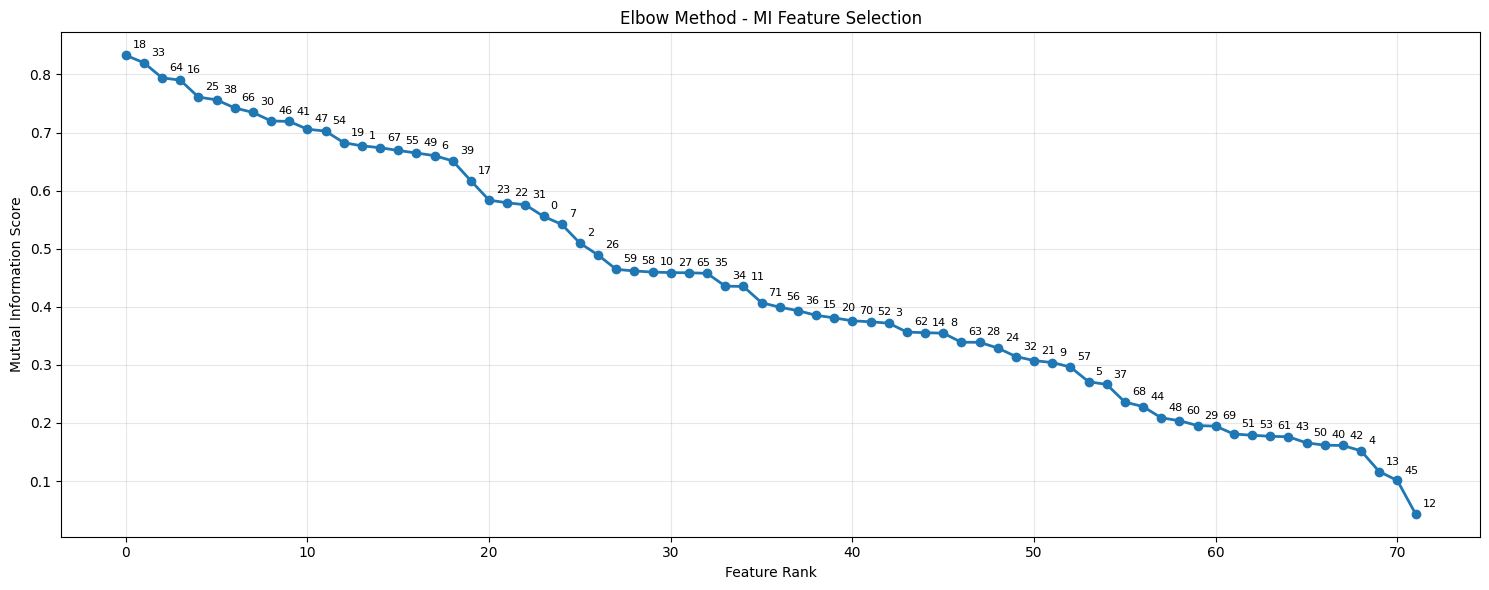

In [50]:
import matplotlib.pyplot as plt
import pandas as pd  # předpokládám, že mi_scores_sorted je pandas Series

fig, ax = plt.subplots(figsize=(15, 6))
ax.plot(range(len(mi_scores_sorted)), mi_scores_sorted.values, 'o-', linewidth=2, markersize=6)

# Přidání názvů features u každého bodu
for i, (feature_name, score) in enumerate(mi_scores_sorted.items()):
    ax.annotate(feature_name, (i, score), xytext=(5, 5), textcoords='offset points', 
                fontsize=8, ha='left')

ax.set_xlabel('Feature Rank')
ax.set_ylabel('Mutual Information Score')
ax.set_title('Elbow Method - MI Feature Selection')
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [85]:
top_features = mi_scores.nlargest(65).index.tolist()
x_train_selected = x_train_Znorm[top_features]
x_val_selected = x_val_Znorm[top_features]


## Random Forest

In [86]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

# vytvoření a natrénování Random Forest modelu
rf_model_fs = RandomForestClassifier(
    n_estimators=5000,
    max_depth=None,
    class_weight=vah_trid_dict,
    random_state=5000,
    n_jobs=-1
)
rf_model_fs.fit(x_train_selected, np.argmax(y_train, axis=1))
# vyhodnocení na validačních datech
y_val_pred_fs = rf_model_fs.predict(x_val_selected)
print("==== Výsledky na validačních datech ====")
presnost = accuracy_score(np.argmax(y_val, axis=1), y_val_pred_fs)
print(f"Přesnost: {presnost:.4f}")
print(classification_report(np.argmax(y_val, axis=1), y_val_pred_fs))
print("Konfuzní matice:")
print(confusion_matrix(np.argmax(y_val, axis=1), y_val_pred_fs))

==== Výsledky na validačních datech ====
Přesnost: 0.8333
              precision    recall  f1-score   support

           0       0.89      0.80      0.84        10
           1       0.82      0.90      0.86        10
           2       0.73      0.89      0.80         9
           3       0.60      0.67      0.63         9
           4       1.00      0.80      0.89        10
           5       1.00      0.92      0.96        12

    accuracy                           0.83        60
   macro avg       0.84      0.83      0.83        60
weighted avg       0.85      0.83      0.84        60

Konfuzní matice:
[[ 8  0  1  1  0  0]
 [ 0  9  0  1  0  0]
 [ 0  1  8  0  0  0]
 [ 0  1  2  6  0  0]
 [ 0  0  0  2  8  0]
 [ 1  0  0  0  0 11]]


## SVM metoda

In [70]:
import numpy as np
from sklearn.svm import SVC
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

# Vytvoření a natrénování SVM modelu s vyvážením tříd
svm_model = SVC(
    kernel='rbf',              # nebo 'linear'/'poly' dle potřeby
    class_weight=vah_trid_dict,  # zohlednění nevyvážených tříd
    probability=True,            # pro pravděpodobnosti (pokud bys je potřeboval)
    random_state=42
)

svm_model.fit(x_train_selected, np.argmax(y_train, axis=1))

# Vyhodnocení na validačních datech
y_val_pred = svm_model.predict(x_val_selected)
print("==== Výsledky na validačních datech ====")
presnost = accuracy_score(np.argmax(y_val, axis=1), y_val_pred)
print(f"Přesnost: {presnost:.4f}")
print(classification_report(np.argmax(y_val, axis=1), y_val_pred))
print("Konfuzní matice:")
print(confusion_matrix(np.argmax(y_val, axis=1), y_val_pred))


==== Výsledky na validačních datech ====
Přesnost: 0.8333
              precision    recall  f1-score   support

           0       0.73      0.80      0.76        10
           1       0.90      0.90      0.90        10
           2       0.73      0.89      0.80         9
           3       0.67      0.67      0.67         9
           4       1.00      0.80      0.89        10
           5       1.00      0.92      0.96        12

    accuracy                           0.83        60
   macro avg       0.84      0.83      0.83        60
weighted avg       0.85      0.83      0.84        60

Konfuzní matice:
[[ 8  0  1  1  0  0]
 [ 0  9  0  1  0  0]
 [ 0  0  8  1  0  0]
 [ 1  0  2  6  0  0]
 [ 1  1  0  0  8  0]
 [ 1  0  0  0  0 11]]


# Feature selection mRMR

In [3]:
from sklearn.utils.class_weight import compute_class_weight
x_train_Znorm=pd.read_csv('x_train_Znorm.csv')
x_val_Znorm=pd.read_csv('x_val_Znorm.csv')
y_train=pd.DataFrame(np.argmax(np.load('y_train.npy'),axis=1))
y_val=pd.DataFrame(np.argmax(np.load('y_val.npy'),axis=1))

# výpočet váhy tříd na základě trénovacích dat
tridy = np.unique(y_train)
vah_trid = compute_class_weight(class_weight='balanced', classes=tridy, y=y_train)
vah_trid_dict = dict(zip(tridy, vah_trid))

## vse

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from mrmr import mrmr_classif
from sklearn.metrics import classification_report


import numpy as np

selected = mrmr_classif(X=x_train_Znorm, y=y_train, K=72)
K_values = range(10, 72,1)
rf_scores = []
svm_scores = []
knn_scores = []
gb_scores = []
lr_scores = []
nb_scores = []

for K in K_values:
    x_train_sel = x_train_Znorm[selected[:K]]
    x_val_sel = x_val_Znorm[selected[:K]]
    #Random Forest
    rf_model = RandomForestClassifier(n_estimators=5000,max_depth=None,class_weight=vah_trid_dict,random_state=5000,n_jobs=-1)
    rf_model.fit(x_train_sel, y_train)
    report_dict = classification_report(y_val, rf_model.predict(x_val_sel), output_dict=True)
    report = [report_dict['accuracy'],report_dict['macro avg']['precision'],report_dict['macro avg']['recall'],report_dict['macro avg']['f1-score']]
    rf_scores.append(report)
    #SVM
    svm_model = SVC(kernel='rbf',class_weight=vah_trid_dict,probability=True,random_state=42)
    svm_model.fit(x_train_sel, y_train)
    report_dict = classification_report(y_val, svm_model.predict(x_val_sel), output_dict=True)
    report = [report_dict['accuracy'],report_dict['macro avg']['precision'],report_dict['macro avg']['recall'],report_dict['macro avg']['f1-score']]
    svm_scores.append(report)
    #KNN
    knn_model = KNeighborsClassifier(n_neighbors=5,weights='distance',n_jobs=-1)
    knn_model.fit(x_train_sel, y_train)
    report_dict = classification_report(y_val, knn_model.predict(x_val_sel), output_dict=True)
    report = [report_dict['accuracy'],report_dict['macro avg']['precision'],report_dict['macro avg']['recall'],report_dict['macro avg']['f1-score']]
    knn_scores.append(report)
    #Gradient Boosting
    gb_model = GradientBoostingClassifier(n_estimators=300,learning_rate=0.1,max_depth=100,random_state=42)
    gb_model.fit(x_train_sel, y_train)
    report_dict = classification_report(y_val, gb_model.predict(x_val_sel), output_dict=True)
    report = [report_dict['accuracy'],report_dict['macro avg']['precision'],report_dict['macro avg']['recall'],report_dict['macro avg']['f1-score']]
    gb_scores.append(report)
    #Logistic Regression
    lr_model = LogisticRegression(solver='lbfgs',class_weight=vah_trid_dict,max_iter=1000,random_state=42,n_jobs=-1)
    lr_model.fit(x_train_sel, y_train)
    report_dict = classification_report(y_val, lr_model.predict(x_val_sel), output_dict=True)
    report = [report_dict['accuracy'],report_dict['macro avg']['precision'],report_dict['macro avg']['recall'],report_dict['macro avg']['f1-score']]
    lr_scores.append(report)
    #Naive Bayes
    nb_model = GaussianNB()
    nb_model.fit(x_train_sel, y_train)
    report_dict = classification_report(y_val, nb_model.predict(x_val_sel), output_dict=True)
    report = [report_dict['accuracy'],report_dict['macro avg']['precision'],report_dict['macro avg']['recall'],report_dict['macro avg']['f1-score']]
    nb_scores.append(report)
    print(f'K={K} done')
    

100%|██████████| 72/72 [00:02<00:00, 30.93it/s]


K=10 done
K=11 done
K=12 done
K=13 done
K=14 done
K=15 done
K=16 done
K=17 done
K=18 done
K=19 done
K=20 done
K=21 done
K=22 done
K=23 done
K=24 done
K=25 done
K=26 done
K=27 done
K=28 done
K=29 done
K=30 done
K=31 done
K=32 done
K=33 done
K=34 done
K=35 done
K=36 done
K=37 done
K=38 done
K=39 done
K=40 done
K=41 done
K=42 done
K=43 done
K=44 done
K=45 done
K=46 done
K=47 done
K=48 done
K=49 done
K=50 done
K=51 done
K=52 done
K=53 done
K=54 done
K=55 done
K=56 done
K=57 done
K=58 done
K=59 done
K=60 done
K=61 done
K=62 done
K=63 done
K=64 done
K=65 done
K=66 done
K=67 done
K=68 done
K=69 done
K=70 done
K=71 done


In [14]:
rf_scores = np.array(rf_scores)
svm_scores = np.array(svm_scores)
knn_scores = np.array(knn_scores)
gb_scores = np.array(gb_scores)
lr_scores = np.array(lr_scores)
nb_scores = np.array(nb_scores)

In [ ]:
print(f'Optimální K: {K_values[np.argmax(nb_scores[:,0])]}, NB acc={np.max(nb_scores[:,0]):.3f}, Precision={nb_scores[np.argmax(nb_scores[:,0]),1]:.3f}, Recall={nb_scores[np.argmax(nb_scores[:,0]),2]:.3f}, F1={nb_scores[np.argmax(nb_scores[:,0]),3]:.3f}')
print(f'Optimální K: {K_values[np.argmax(rf_scores[:,0])]}, RF acc={np.max(rf_scores[:,0]):.3f}, Precision={rf_scores[np.argmax(rf_scores[:,0]),1]:.3f}, Recall={rf_scores[np.argmax(rf_scores[:,0]),2]:.3f}, F1={rf_scores[np.argmax(rf_scores[:,0]),3]:.3f}')
print(f'Optimální K: {K_values[np.argmax(svm_scores[:,0])]}, SVM acc={np.max(svm_scores[:,0]):.3f}, Precision={svm_scores[np.argmax(svm_scores[:,0]),1]:.3f}, Recall={svm_scores[np.argmax(svm_scores[:,0]),2]:.3f}, F1={svm_scores[np.argmax(svm_scores[:,0]),3]:.3f}')
print(f'Optimální K: {K_values[np.argmax(knn_scores[:,0])]}, KNN acc={np.max(knn_scores[:,0]):.3f}, Precision={knn_scores[np.argmax(knn_scores[:,0]),1]:.3f}, Recall={knn_scores[np.argmax(knn_scores[:,0]),2]:.3f}, F1={knn_scores[np.argmax(knn_scores[:,0]),3]:.3f}')
print(f'Optimální K: {K_values[np.argmax(gb_scores[:,0])]}, GB acc={np.max(gb_scores[:,0]):.3f}, Precision={gb_scores[np.argmax(gb_scores[:,0]),1]:.3f}, Recall={gb_scores[np.argmax(gb_scores[:,0]),2]:.3f}, F1={gb_scores[np.argmax(gb_scores[:,0]),3]:.3f}')
print(f'Optimální K: {K_values[np.argmax(lr_scores[:,0])]}, LR acc={np.max(lr_scores[:,0]):.3f}, Precision={lr_scores[np.argmax(lr_scores[:,0]),1]:.3f}, Recall={lr_scores[np.argmax(lr_scores[:,0]),2]:.3f}, F1={lr_scores[np.argmax(lr_scores[:,0]),3]:.3f}')


Optimální K: 34, RF acc=0.850, Precision=0.862, Recall=0.847, F1=0.849
Optimální K: 35, SVM acc=0.900, Precision=0.908, Recall=0.901, F1=0.900
Optimální K: 39, KNN acc=0.900, Precision=0.906, Recall=0.896, F1=0.894
Optimální K: 56, GB acc=0.883, Precision=0.872, Recall=0.874, F1=0.872
Optimální K: 40, LR acc=0.917, Precision=0.920, Recall=0.918, F1=0.916
Optimální K: 58, NB acc=0.817, Precision=0.828, Recall=0.818, F1=0.815
